In [2]:
from data_class import *
from create_statespace_class import *

import numpy as np

np.random.seed(42)
# choose which app to look at between 'EVOKE' and 'MOMENT'
app = "EVOKE"

# get the data
paths = ['part-00000-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5531-1-c000.json',
         'part-00001-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5532-1-c000.json',
         'part-00002-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5533-1-c000.json',
         'part-00003-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5534-1-c000.json']

In [3]:
# create the data object
data = Data(paths, app)

In [4]:
# clean the data
data.clean()

In [5]:
# create the state space
space = Space(app)

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


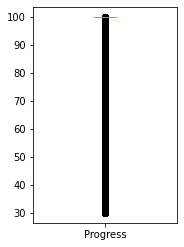

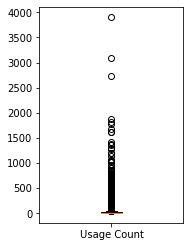

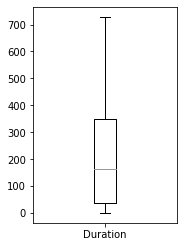

In [7]:
# plot progress, duration days, usage count Boxplot

# Creating plot
fig = plt.figure(figsize =(2, 3))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot([data.progress])
ax.set_xticklabels(['Progress'])
#plt.title(r'Progress')
# show plot
plt.show()

fig = plt.figure(figsize =(2, 3))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot([data.usage])
ax.set_xticklabels(['Usage Count'])
#plt.title(r'Usage Count')
# show plot
plt.show()

fig = plt.figure(figsize =(2, 3))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot([data.duration])
ax.set_xticklabels(['Duration'])
#plt.title(r'Duration')
# show plot
plt.show()

Text(0.5, 1.0, 'Duration days')

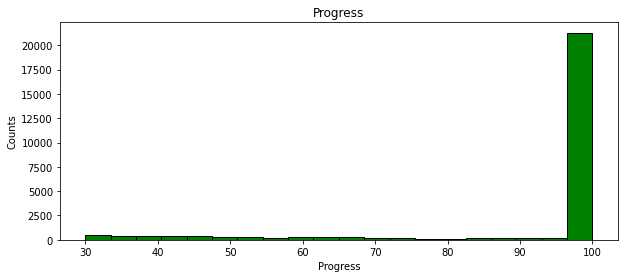

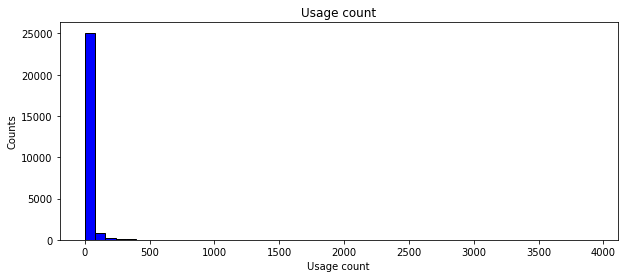

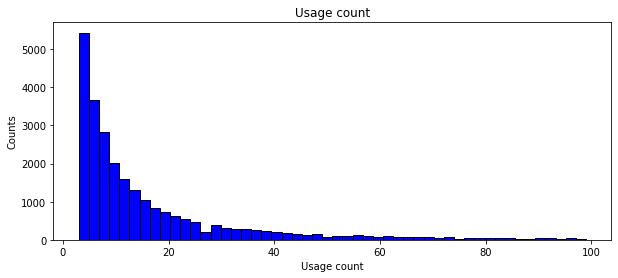

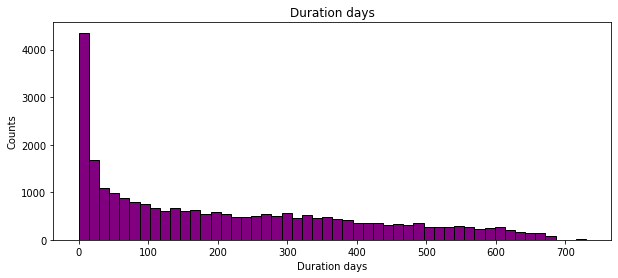

In [8]:
# plot progress, duration days, usage count hist

fig = plt.figure(figsize =(10, 4))
bins = 20
plt.hist(data.progress, bins, color='green', edgecolor='black', linewidth=1)
plt.xlabel('Progress')
plt.ylabel('Counts')
plt.title(r'Progress')

fig = plt.figure(figsize =(10, 4))
bins = 50
plt.hist(data.usage, bins, color='blue', edgecolor='black', linewidth=1)
plt.xlabel('Usage count')
plt.ylabel('Counts')
plt.title(r'Usage count')

usage = np.asarray(data.usage)
usage_low = usage[usage < 100]
fig = plt.figure(figsize =(10, 4))
bins = 50
plt.hist(usage_low, bins, color='blue', edgecolor='black', linewidth=1)
plt.xlabel('Usage count')
plt.ylabel('Counts')
plt.title(r'Usage count')

fig = plt.figure(figsize =(10, 4))
bins = 50
plt.hist(data.duration, bins, color='purple', edgecolor='black', linewidth=1)
plt.xlabel('Duration days')
plt.ylabel('Counts')
plt.title(r'Duration days')

Text(0.5, 1.0, 'number of saved settings per unique ID')

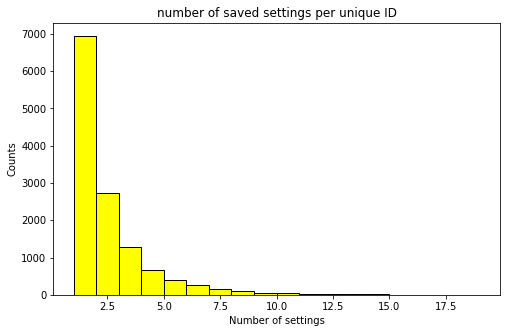

In [9]:
# plot histogram of number of programs per user

bins, counts = np.unique(np.asarray(data.ID_counts),return_counts=True)

fig = plt.figure(figsize =(8, 5))
plt.hist(data.ID_counts, bins, color='yellow', edgecolor='black', linewidth=1)
plt.xlabel('Number of settings')
plt.ylabel('Counts')
plt.title(r'number of saved settings per unique ID')

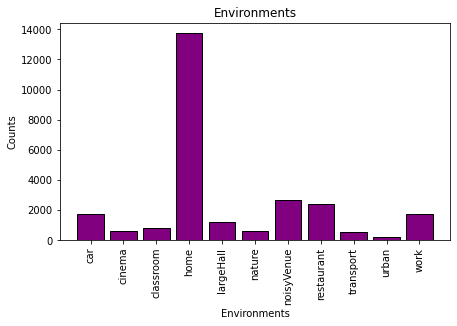

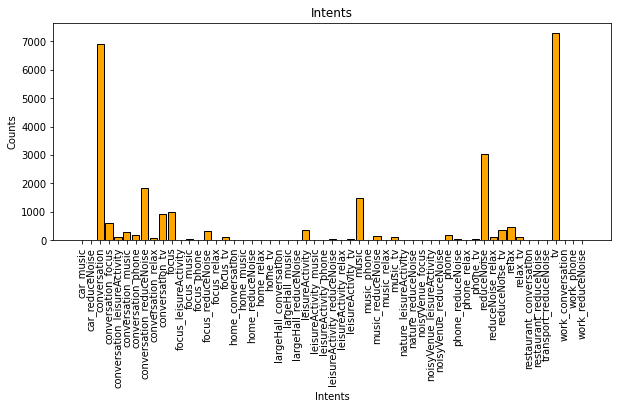

In [10]:
# count the envs
env_titles, env_counts = np.unique(np.asarray(data.envs),return_counts=True)
# plot the histograms of environments  
fig = plt.figure(figsize =(7, 4))
plt.bar(env_titles,env_counts, color='purple', edgecolor='black', linewidth=1)
plt.xlabel('Environments')
plt.ylabel('Counts')
plt.title(r'Environments')
plt.xticks(rotation=90)
plt.show()

# count the intents
int_titles, int_counts = np.unique(np.asarray(data.intents),return_counts=True)
# plot the histograms of intents  
fig = plt.figure(figsize =(10, 4))
plt.bar(int_titles,int_counts, color='orange', edgecolor='black', linewidth=1)
plt.xlabel('Intents')
plt.ylabel('Counts')
plt.title(r'Intents')
plt.xticks(rotation=90)
plt.show()

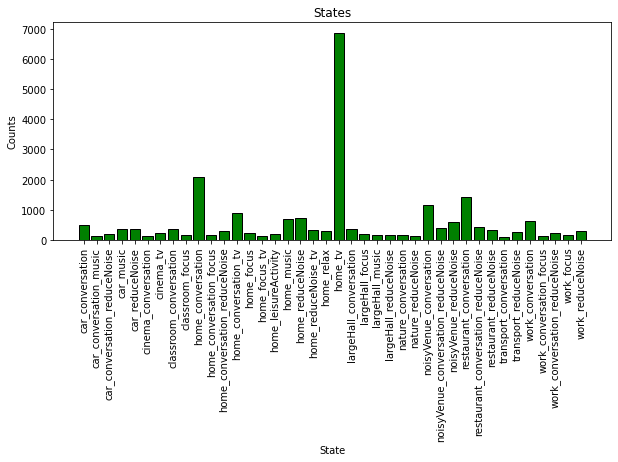

In [11]:
# count the states
data.useful_states(100)
state_titles, state_counts = np.unique(np.asarray(data.states),return_counts=True)

fig = plt.figure(figsize =(10, 4))
plt.bar(state_titles, state_counts, color='green', edgecolor='black', linewidth=1)
plt.xlabel('State')
plt.ylabel('Counts')
plt.title(r'States')
plt.xticks(rotation=90)
plt.show()

In [12]:
# create matrix for [Bass, Midrange, Treble] settings (they are currently in a list)
setting_vector = np.ones((len(data.settings),3))
setting_vector[:] = None

for i, setting in enumerate(data.settings):
    setting_vector[i, 0] = setting[0]
    setting_vector[i, 1] = setting[1]
    setting_vector[i, 2] = setting[2]
    
setting_vector = setting_vector.astype(int)

In [13]:
# split the settings based on state
sets = []
dts = np.asarray(data.states)
for state in space.states:
    set_state = setting_vector[dts==state]
    sets.append(set_state)

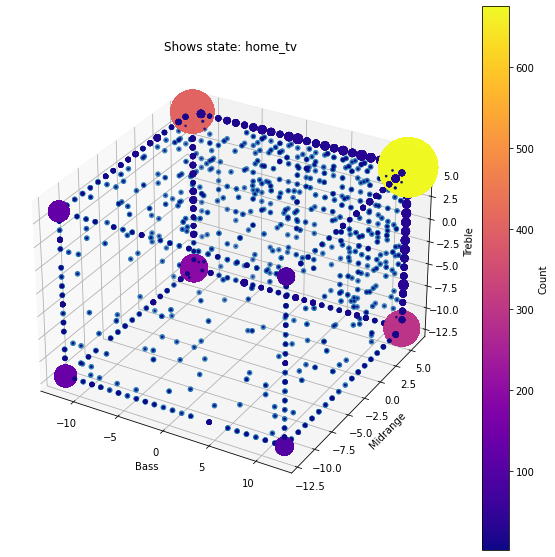

In [14]:
# 3D plot af best settings (we want density, but we have this for now)


# get index for desired state
state = 'home_tv'
index = space.states.index(state)
set_state = sets[index]

bass = set_state[:,0]
midrange = set_state[:,1]
treble = set_state[:,2]

# count how many times each setting occurs

state_matrix = np.zeros((25, 19, 19))
for setting in set_state:
    state_matrix[setting[0]+12,setting[1]+12,setting[2]+12] += 1

setting_count = np.zeros(set_state.shape[0])
for i, setting in enumerate(set_state):
    setting_count[i] = state_matrix[setting[0]+12,setting[1]+12,setting[2]+12]

# remove the dots that represent settings with less than threshold instances
thresh = 2
remove = []
for i, count in enumerate(setting_count):
    if count < thresh: 
        remove.append(i)

for i in sorted(remove, reverse=True):
    bass = np.delete(bass,i)
    midrange = np.delete(midrange,i)
    treble = np.delete(treble,i)
    setting_count = np.delete(setting_count,i)
# make plot wit chosen set from matrix


fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bass, midrange, treble)
pnt3d=ax.scatter(bass, midrange, treble,c=setting_count, s=setting_count**1.25, cmap='plasma', label=state,edgecolor='face')
ax.set_xlabel('Bass')
ax.set_ylabel('Midrange')
ax.set_zlabel('Treble')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Count")
plt.title(r'Shows state: {}'.format(state))

plt.show()